# Boltzmann Money modelのコード確認

In [47]:
import random
from mesa import Agent, Model
from mesa.time import RandomActivation

class MoneyAgent(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)#スーパークラスの初期化メソッドを継承
        self.wealth = 1 #アトリビュートwealth定義

    def step(self): # MoneyAgent のstepメソッドにお金を渡す動作を指定する
        if self.wealth == 0: #自分の富が0なら何もしない
            return
        other_agent = random.choice(self.model.schedule.agents)#modelのschedule属性からagents情報を取得
        #　 other_agent　には他者が1人はいる．自分自身を選ぶこともある　print(other_agent)
        other_agent.wealth += 1
        self.wealth -= 1       
        

class MoneyModel(Model):
    """A model with some number of agents."""
    # MoneyModelクラスの初期化メソッド
    def __init__(self, N): #初期化メソッドの引数はN.selfはデフォ．
        self.num_agents = N#num_agentsアトリビュートにNを代入
        self.schedule = RandomActivation(self) # scheduleアトリビュートにRandomActivationクラスを指定
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)#Agentクラスをインスタンス化．ここでMoneyAgent クラスのunique_idが決まる．
            self.schedule.add(a) # a をschedule.addの引数として渡す．
            #このaddメソッドでagents(リスト)の中身がMoneyAgent classのインスタンス
        # MoneyModelクラスの初期化メソッドココまで

    def step(self):
        '''Advance the model by one step.'''
        self.schedule.step()#このstepはRandomActivationクラスのメソッド
        #　中身は
        """
        def step(self):
        random.shuffle(self.agents)
        for agent in self.agents:
            agent.step()
        self.steps += 1
        self.time += 1
        """


(array([ 4.,  0.,  0.,  3.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

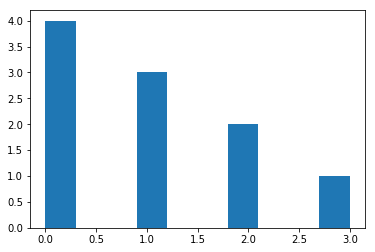

In [48]:
# モデルを1回実行
model = MoneyModel(10)
#for i in range(10):
model.step()

# For a jupyter notebook add the following line:
%matplotlib inline

# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt

agent_wealth = [a.wealth for a in model.schedule.agents]
plt.hist(agent_wealth)


(array([ 439.,  287.,  161.,   73.,   30.,   10.]),
 array([0, 1, 2, 3, 4, 5, 6]),
 <a list of 6 Patch objects>)

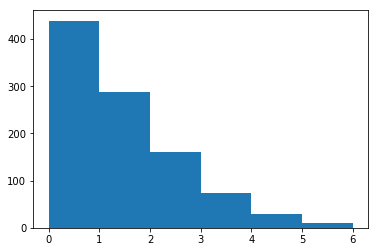

In [49]:
all_wealth = []
for j in range(100):# index j で100回繰り返し
    # Run the model
    model = MoneyModel(10)# 10人でmodelをインスタンス化
    for i in range(10):
        model.step() # modelのメソッドstepを10回繰り返す．
    
    # Store the results
    for agent in model.schedule.agents:
        all_wealth.append(agent.wealth)

plt.hist(all_wealth, bins=range(max(all_wealth)+1))


## 確認

In [50]:
# model = MoneyModel(50)のアトリビュート（schedule）はRandomActivationのインスタンス
model = MoneyModel(10)
model.schedule


In [51]:
# RandomActivationのインスタンスのアトリビュート.agentはMoneyAgentインスタンスのリスト
model.schedule.agents


In [52]:
model.schedule.agents[0]


In [53]:
# アトリビュート確認．step実行前なので，全員1
model.schedule.agents[0].wealth


1

In [54]:
[model.schedule.agents[i].wealth for i in range(10)]


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

## 参照元のスーパークラス一覧

In [55]:
class Agent:
    """ Base class for a model agent. """
    def __init__(self, unique_id, model):
        """ Create a new agent. """
        self.unique_id = unique_id
        self.model = model

    def step(self):
        """ A single step of the agent. """
        pass


In [56]:
# Core Objects: Model

import datetime as dt
import random


class Model:
    def __init__(self, seed=None):
        """ Create a new model. Overload this method with the actual code to start the model.
        Args:
            seed: seed for the random number generator
        Attributes:
            schedule: schedule object
            running: a bool indicating if the model should continue running
        """
        if seed is None:
            self.seed = dt.datetime.now()
        else:
            self.seed = seed
        random.seed(seed)
        self.running = True
        self.schedule = None

    def run_model(self):
        """ Run the model until the end condition is reached. Overload as
        needed.
        """
        while self.running:
            self.step()

    def step(self):
        """ A single step. Fill in here. """
        pass


In [57]:
import random

class BaseScheduler:
    """ Simplest scheduler; activates agents one at a time, in the order
    they were added. Assumes that each agent added has a *step* method which takes no arguments.
    (This is explicitly meant to replicate the scheduler in MASON).

    """
    model = None
    steps = 0
    time = 0
    agents = []

    def __init__(self, model):
        """ Create a new, empty BaseScheduler. """
        self.model = model
        self.steps = 0
        self.time = 0
        self.agents = []

    def add(self, agent):
        """ Add an Agent object to the schedule.
        Args:
            agent: An Agent to be added to the schedule. NOTE: The agent must
            have a step() method.

        """
        self.agents.append(agent)

    def remove(self, agent):
        """ Remove all instances of a given agent from the schedule.
        Args:
            agent: An agent object.
        """
        while agent in self.agents:
            self.agents.remove(agent)

    def step(self):
        """ Execute the step of all the agents, one at a time. """
        for agent in self.agents:
            agent.step()
        self.steps += 1
        self.time += 1

    def get_agent_count(self):
        """ Returns the current number of agents in the queue. """
        return len(self.agents)



In [58]:
class RandomActivation(BaseScheduler):
    """ A scheduler which activates each agent once per step, in random order．
    RandomActivationの中身
    """
    def step(self):
        """ Executes the step of all agents, one at a time, in random order.
        ランダムな順番で実行するためのメソッド．
        """
        random.shuffle(self.agents)
        for agent in self.agents:
            agent.step()
        self.steps += 1
        self.time += 1
        